## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)
- [Resources](#resources)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [221]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [222]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [223]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [224]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [225]:
df['converted'].sum() / df['converted'].count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [226]:
mismatch_1 = df.query('group == "treatment" and landing_page != "new_page"').count()[0]
mismatch_2 = df.query('group != "treatment" and landing_page == "new_page"').count()[0]
mismatch_1 + mismatch_2

3893

f. Do any of the rows have missing values?

In [227]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [228]:
# filter out mismatched pairings
treat_oldp = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
ctrl_newp = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

# print total rows
print(treat_oldp.shape)
print(ctrl_newp.shape)

(1965, 5)
(1928, 5)


In [229]:
# Store which indexes need to be removed
remove_index = treat_oldp.append(ctrl_newp).index

#check total row count
remove_index.shape

(3893,)

In [230]:
# create a new dataframe with the indexes of the mismatched parings excluded from analysis
df2 = df.drop(remove_index)
print(df2.shape)  # This should be 294478 - 3893
df2.head()

(290585, 5)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [231]:
# Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [232]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [233]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [234]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [235]:
df2.drop(2893, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [236]:
convert_rate = df2.converted.mean()
convert_rate

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [237]:
control_convert = df2.query('group == "control"')['converted'].mean()
control_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [238]:
treat_convert = df2.query('group == "treatment"')['converted'].mean()
treat_convert

0.11880806551510564

d. What is the probability that an individual received the new page?

In [239]:
df2.query('landing_page == "new_page"').count()[0] / df2['user_id'].nunique()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

At this stage, the evidence indicates that the conversions are marginally higher with the control group (0.120386) than the treatment group (0.118808). Even if the converse were true, there would not be enough evidence to suggest that the treatment page would lead to more conversions. This is because factors such as change aversion and test span durations are not considered. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



<br>
$$H_0: p_{new} \leq p_{old}$$


$$H_1: p_{new} \gt p_{old}$$
<br>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [240]:
p_new = convert_rate
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [241]:
p_old = convert_rate
p_old

0.11959708724499628

c. What is $n_{new}$?

In [242]:
# n_new = new page count
n_new = df2.query(('landing_page == "new_page"')).count()[0]
n_new

145310

d. What is $n_{old}$?

In [243]:
# n_old = old page count
n_old = df2.query(('landing_page == "old_page"')).count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [244]:
new_page_converted = np.random.choice([0,1], size=n_new, p=[p_new, (1-p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [245]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[p_old, (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [246]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

-0.0007964746195795458

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [247]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[p_new, (1-p_new)])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[p_old, (1-p_old)])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

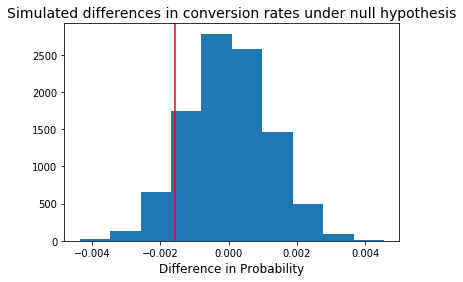

In [248]:
# convert to numpy array
p_diffs = np.array(p_diffs)

# plot histogram
plt.hist(p_diffs)
plt.title("Simulated differences in conversion rates under null hypothesis", fontsize=14)
plt.xlabel('Difference in Probability', fontsize=12)

# add comparison with ab_data.csv (as calculated under Part 1 - Probabilty 4b and 4c)
plt.axvline(treat_convert - control_convert, color='r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [249]:
(p_diffs > (treat_convert - control_convert)).mean()

0.9044

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Part j compared the proportion of the simulated differences in conversion rates under the null hypothesis that was greater than the difference in conversion rate calculated in 4b and 4c which was from ab_data.csv (ie. the real difference). In scientific studies this is called the p-value. 

The type I error rate for this test is 0.05. A p-value less than this would indicate there is a statistical difference between the new and old page. In other words, it would be highly unlikely that we would observe the real conversion rate difference in ab_data.csv in the sampling distrubtion under the null hypothesis. 

As the p_value is 0.9044, this suggests we would fail to reject the null hypothesis and conclude there is insufficient evidence to say there is a difference in conversion between the new and old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [250]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and group == "control"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page" and group == "treatment"')['converted'].sum()
print('convert_old:', convert_old)
print('convert_new:', convert_new)
print('n_new:', n_new)
print('n_old:', n_old)

convert_old: 17489
convert_new: 17264
n_new: 145310
n_old: 145274


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [251]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z_score is -1.31 and the p_value is 0.905. The z-critical for an upper-tailed test with $\alpha$ = 0.05 is 1.645. Since -1.31 is not greater than 1.645, this means we should not reject the null. The p_value is virtually identidcal to the p-value in part j. The results of both would allow us to reach the conclusion in part k (ie. fail to reject the null).

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

This is an example of logistic regression since we are working with only two possibles outcomes (ie. conversion or no conversion).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [252]:
# add intercept column
df2['intercept'] = 1

# add dummy variables
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [253]:
# rename treatment to ab_page and drop control column
df2.rename(columns = {'treatment': 'ab_page'}, inplace=True)
df2.drop('control', axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [254]:
import statsmodels.api as sm

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [255]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-06-10 15:49 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value for ab_page is 0.1899 which indicates that treatment is not a useful variable for determining conversion as it is above the $\alpha$ level of 0.05. The hypthosis for ab_page variable is as follows:

<br>
$$H_0: \beta_1 = 0$$

$$H_1: \beta_1 \neq 0$$

<br>

Therefore you would reject the null hypothesis for this particular variable. This is a two-tailed test whereas in Part II it is a one-tailed test as follows:

<br>
$$H_0: p_{new} \leq p_{old}$$


$$H_1: p_{new} \gt p_{old}$$

<br>

That's why the p-values are different.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Considering other factors in the regression model will give you a better picture of what is influencing conversion. For example, perhaps duration spent on the page, native language of the user or time of day are relevant factors. Then you can plan your changes on these factors if there's enough statistical evidence to suggest they are a predictor for conversion.

The disadvantage of additional terms is the possiblity of multicollinearity and potential for more outliers. The model would need to check for this before forming conclusions. 


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [260]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [261]:
# Check how many countires there are to determine how many dummy variables are needed
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [262]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.tail(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
635122,US,2017-01-20 13:07:51.125996,control,old_page,0,1,0,0,0,1
757673,UK,2017-01-03 21:17:23.416244,treatment,new_page,0,1,1,0,1,0
870839,US,2017-01-15 21:22:00.479523,treatment,new_page,0,1,1,0,0,1
659679,US,2017-01-14 23:49:33.712246,treatment,new_page,0,1,1,0,0,1
674173,US,2017-01-21 21:21:36.827588,treatment,new_page,0,1,1,0,0,1
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,1,0,0


In [268]:
# do not fit with U.S variable as this will be the baseline
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-06-10 16:07 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

The above results indicate that the  country variables (CA and UK) have p-values greater than 0.05. Therefore there is insufficient evidence to suggest that the country variables predict the conversion rate for the two types of landing pages. Hence we would keep the old page (ie. fail to reject the null hypothesis).

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [266]:
### Fit Your Linear Model And Obtain the Results
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK', 'ab_page']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-06-10 15:51 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

Again, the above p-values for the variables ab_page, CA and UK are above 0.05 and therefore we would conclude there is not enough evidence to suggest that these variables can predict the conversion rate of the two pages. We would fail to reject the null hypothesis.

<a id='conclusions'></a>
## Conclusions

- There was not enough evidence to reject the null hypthesis ($H_0$). We should reject $H_1$ and keep the old page. 
- The evidence from the various techniques used above all supported this conclusion. 
- There was even suggestion that the old page very marginally resulted in better conversions.
- The conclusion was reached based on the limited data provided. In reality there would be other factors that need to considered.

<a id='resources'></a>

## Resources


- The below two resources provided a way on dealing with the problem `AttributeError: module 'scipy.stats' has no attribute 'chisqprob'` when running .fit.summary() for logistic regression: 

http://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.summary2.html?highlight=summary2#statsmodels.discrete.discrete_model.LogitResults.summary2

https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob


- The resource below helped me to use LaTeX in Jupyter Notebook:

http://data-blog.udacity.com/posts/2016/10/latex-primer/
